In [1]:
from NeuNorm.normalization import Normalization
from NeuNorm.roi import ROI

from pathlib import Path

import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
sample = 'data/sample.fits'
ob = 'data/ob.fits'

assert Path(sample).exists()
assert Path(ob).exists()


# without any ROI 

In [15]:
o_norm = Normalization()
o_norm.load(file=sample)
o_norm.load(file=ob, data_type='ob')

In [16]:
o_norm.normalization()

True

In [19]:
o_norm.data['normalized']

[array([[ 2.,  2., 10., 10.],
        [ 2.,  2., 10., 10.],
        [ 2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.]])]

# with ROI 

In [31]:
x0=0
y0=0
x1=1
y1=3

In [32]:
o_norm1 = Normalization()
o_norm1.load(file=sample)
o_norm1.load(file=ob, data_type='ob')

In [33]:
my_norm_roi = ROI(x0=x0, y0=y0, x1=x1, y1=y1)

In [34]:
o_norm1.normalization(roi=my_norm_roi)

True

In [35]:
o_norm1.data['normalized']

[array([[1., 1., 5., 5.],
        [1., 1., 5., 5.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])]

# Testing with real dataset 

In [1]:
from NeuNorm.normalization import Normalization
from NeuNorm.roi import ROI

from pathlib import Path

import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
sample = ['data/sample_02.fits']
ob = ['data/ob_02.fits']

for _sample in sample:
    assert Path(_sample).exists()

for _ob in ob:
    assert Path(_ob).exists()

In [3]:
x0=118
y0=18
x1=259
y1=489
width = x1 - x0
height = y1 - y0

In [4]:
o_norm1 = Normalization()
o_norm1.load(file=sample)
o_norm1.load(file=ob, data_type='ob')

In [5]:
o_norm1.data['sample']['data']

[array([[12.576987, 24.695074, 22.633827, ..., 31.745237, 33.91798 ,
         26.2655  ],
        [24.934967, 32.23827 , 31.993055, ..., 39.372524, 47.984722,
         38.83415 ],
        [37.11648 , 47.56442 , 45.05235 , ..., 51.852585, 63.348133,
         42.120388],
        ...,
        [45.262993, 52.371517, 53.52411 , ..., 94.11306 , 79.43615 ,
         52.960762],
        [42.492355, 52.796173, 49.255108, ..., 75.95342 , 62.347267,
         49.979027],
        [25.481306, 36.83294 , 38.808304, ..., 61.969185, 48.217564,
         44.822647]], dtype=float32)]

In [6]:
o_norm1.data['ob']['data']

[array([[ 58.945133,  69.96953 ,  80.00136 , ..., 109.885086, 101.24385 ,
         115.721855],
        [ 92.58963 , 129.22655 , 110.71366 , ..., 157.99374 , 117.827225,
         114.951584],
        [107.44954 , 145.3926  , 127.86992 , ..., 147.86884 , 143.9236  ,
         122.262985],
        ...,
        [275.90897 , 391.28268 , 336.05923 , ..., 205.57011 , 211.14    ,
         153.75233 ],
        [285.1669  , 289.07205 , 273.6134  , ..., 180.84842 , 191.95732 ,
         170.4815  ],
        [177.59496 , 207.7382  , 185.1904  , ..., 145.85289 , 155.29019 ,
         123.751366]], dtype=float32)]

In [7]:
# my_norm_roi = ROI(x0=x0, y0=y0, x1=x1, y1=y1)
my_norm_roi = ROI(x0=x0, y0=y0, width=width, height=height)
o_norm1.df_correction()
o_norm1.normalization(roi=my_norm_roi, notebook=True)

True

In [18]:
my_norm_roi

In [8]:
o_norm1.data['sample']['data']

[array([[0.2711843 , 0.5324738 , 0.48802933, ..., 0.6844891 , 0.7313376 ,
         0.56633526],
        [0.53764635, 0.6951198 , 0.6898325 , ..., 0.8489482 , 1.0346439 ,
         0.83733976],
        [0.8003035 , 1.0255814 , 0.97141623, ..., 1.1180426 , 1.365909  ,
         0.90819746],
        ...,
        [0.97595817, 1.1292318 , 1.1540838 , ..., 2.0292606 , 1.7127979 ,
         1.141937  ],
        [0.9162178 , 1.1383882 , 1.0620359 , ..., 1.6377035 , 1.3443283 ,
         1.0776451 ],
        [0.5494265 , 0.7941898 , 0.8367825 , ..., 1.3361762 , 1.0396644 ,
         0.96646345]], dtype=float32)]

In [9]:
normalized_data = o_norm1.get_normalized_data()

<IPython.core.display.Javascript object>


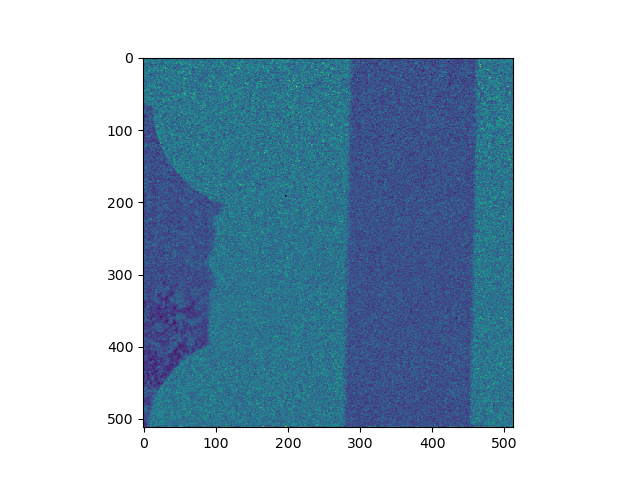

In [19]:
plt.figure(1)
plt.imshow(o_norm1.get_normalized_data()[0])

<IPython.core.display.Javascript object>


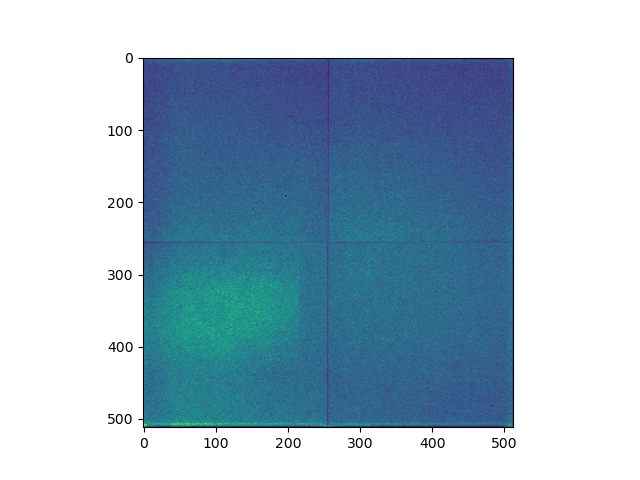

{'data': [array([[ 0.      ,  0.      ,  0.      , ...,  0.      , 15.167233,
        15.167233],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [ 0.      ,  0.      , 15.167233, ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ]], dtype=float32), array([[0.39719123, 0.5467495 , 0.52558273, ..., 0.62985045, 0.56692857,
        0.67168456],
       [0.64807284, 0.8485819 , 0.8834762 , ..., 0.8105286 , 0.79782426,
        0.8420223 ],
       [0.6602672 , 1.1040193 , 0.97681403, ..., 0.9089128 , 1.011111  ,
        0.9836378 ],
       ...,
       [2.3547435 , 2.697869  , 2.359781  , ..., 1.6133425 , 1.6359328 ,
        1.0146585 ],
       [2.2231035 , 1.9755623 , 2.1485624 , .

In [11]:
plt.figure(3)
plt.imshow(o_norm1.data['ob']['data'][2])
print(o_norm1.data['ob'])

<IPython.core.display.Javascript object>


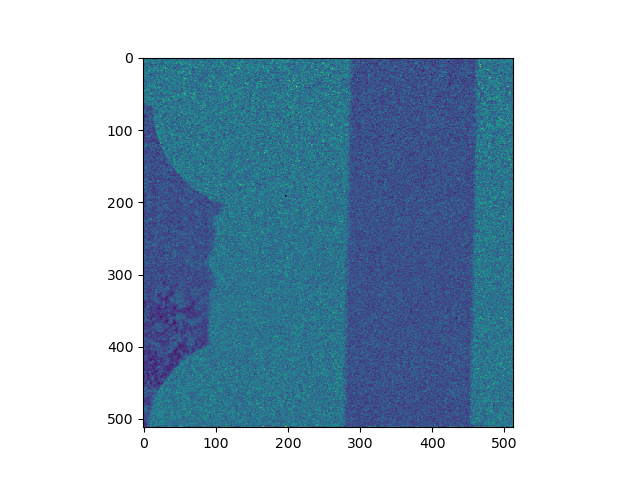

In [12]:
plt.figure(2)
plt.imshow(o_norm1.data['normalized'][2])